In [821]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [822]:
df=pd.read_csv("/Users/prince/Downloads/Vehicle_policies_2020.csv")
df.head(5)

,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium,Gender
0,43124327,12/30/2020,F,4.0,07/12/68,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53,1
1,21919609,12/30/2020,F,2.0,11/05/82,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53,1
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53,0
3,92175225,12/30/2020,M,4.0,11/02/60,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53,0
4,66223239,12/30/2020,F,4.0,01/04/68,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53,1


In [823]:
df.columns

Index(['pol_number', 'pol_eff_dt', 'gender', 'agecat', 'date_of_birth',
       'credit_score', 'area', 'traffic_index', 'veh_age', 'veh_body',
       'veh_value', 'claim_office', 'numclaims', 'claimcst0', 'annual_premium',
       'Gender'],
      dtype='object')

In [824]:
df.iloc[:,0]

0        43124327
1        21919609
2        72577057
3        92175225
4        66223239
           ...   
60387    73248694
60388    71411764
60389    89353155
60390    40916605
60391    33623054
Name: pol_number, Length: 60392, dtype: int64

In [825]:
columns= df.columns

In [826]:
df.isna().sum()

pol_number            0
pol_eff_dt            0
gender                0
agecat             4831
date_of_birth         0
credit_score       2801
area                  0
traffic_index      3503
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
Gender                0
dtype: int64

In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      60392 non-null  int64  
 1   pol_eff_dt      60392 non-null  object 
 2   gender          60392 non-null  object 
 3   agecat          55561 non-null  float64
 4   date_of_birth   60392 non-null  object 
 5   credit_score    57591 non-null  float64
 6   area            60392 non-null  object 
 7   traffic_index   56889 non-null  float64
 8   veh_age         60392 non-null  int64  
 9   veh_body        60392 non-null  object 
 10  veh_value       60392 non-null  float64
 11  claim_office    10030 non-null  object 
 12  numclaims       60392 non-null  int64  
 13  claimcst0       60392 non-null  float64
 14  annual_premium  60392 non-null  float64
 15  Gender          60392 non-null  int64  
dtypes: float64(6), int64(4), object(6)
memory usage: 7.4+ MB


In [828]:
df.shape

(60392, 16)

In [829]:
v1=lambda x:float(x[1:-1])

In [830]:
df= df.drop(['gender'],axis=1)

In [831]:
df.iloc[:,0]=df.iloc[:,0].astype('category')
df.iloc[:,0]=df.iloc[:,0].cat.codes

In [832]:
df.dropna(inplace=True)

In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8123 entries, 15 to 60375
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      8123 non-null   int32  
 1   pol_eff_dt      8123 non-null   object 
 2   agecat          8123 non-null   float64
 3   date_of_birth   8123 non-null   object 
 4   credit_score    8123 non-null   float64
 5   area            8123 non-null   object 
 6   traffic_index   8123 non-null   float64
 7   veh_age         8123 non-null   int64  
 8   veh_body        8123 non-null   object 
 9   veh_value       8123 non-null   float64
 10  claim_office    8123 non-null   object 
 11  numclaims       8123 non-null   int64  
 12  claimcst0       8123 non-null   float64
 13  annual_premium  8123 non-null   float64
 14  Gender          8123 non-null   int64  
dtypes: float64(6), int32(1), int64(3), object(5)
memory usage: 983.6+ KB


In [834]:
df.pol_eff_dt= pd.to_datetime(df.pol_eff_dt)

In [835]:
df.date_of_birth= pd.to_datetime(df.date_of_birth)

In [836]:
df.reset_index(inplace=True)
df.drop('claim_office', inplace=True, axis=1)
df.head()

,index,pol_number,pol_eff_dt,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium,Gender
0,15,52173,2020-12-30,5.0,2057-08-07,584.0,C,105.0,3,SEDAN,1.5290,1,1120.833360,716.53,0
1,18,31510,2020-12-30,3.0,1977-04-25,396.0,E,25.5,4,UTE,1.6500,2,4548.075015,716.53,0
2,28,6039,2020-12-30,4.0,1965-06-14,347.0,B,136.3,3,SEDAN,1.6170,1,2265.262185,716.53,1
3,30,54349,2020-12-30,2.0,1980-04-11,431.0,C,111.0,1,HBACK,2.4178,3,6616.971570,716.53,1
4,39,57294,2020-12-30,4.0,1968-11-16,798.0,B,129.6,4,SEDAN,1.1880,2,225.489518,716.53,1


In [837]:
df.reset_index(inplace=True)
df.drop('pol_eff_dt', inplace=True, axis=1)
df.head()

,level_0,index,pol_number,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium,Gender
0,0,15,52173,5.0,2057-08-07,584.0,C,105.0,3,SEDAN,1.5290,1,1120.833360,716.53,0
1,1,18,31510,3.0,1977-04-25,396.0,E,25.5,4,UTE,1.6500,2,4548.075015,716.53,0
2,2,28,6039,4.0,1965-06-14,347.0,B,136.3,3,SEDAN,1.6170,1,2265.262185,716.53,1
3,3,30,54349,2.0,1980-04-11,431.0,C,111.0,1,HBACK,2.4178,3,6616.971570,716.53,1
4,4,39,57294,4.0,1968-11-16,798.0,B,129.6,4,SEDAN,1.1880,2,225.489518,716.53,1


In [838]:
df.drop('date_of_birth', inplace=True, axis=1)
df.head()

,level_0,index,pol_number,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium,Gender
0,0,15,52173,5.0,584.0,C,105.0,3,SEDAN,1.5290,1,1120.833360,716.53,0
1,1,18,31510,3.0,396.0,E,25.5,4,UTE,1.6500,2,4548.075015,716.53,0
2,2,28,6039,4.0,347.0,B,136.3,3,SEDAN,1.6170,1,2265.262185,716.53,1
3,3,30,54349,2.0,431.0,C,111.0,1,HBACK,2.4178,3,6616.971570,716.53,1
4,4,39,57294,4.0,798.0,B,129.6,4,SEDAN,1.1880,2,225.489518,716.53,1


In [839]:
def tran_area(x):
    if x=='A':
        return 5
    if x=='B':
        return 6
    if x=='C':
        return 7
    if x=='D':
        return 8
    if x=='E':
        return 9
    if x=='F':
        return 10

In [840]:
df['tran_area']=df['area'].apply(tran_area)

In [841]:
df

,level_0,index,pol_number,agecat,credit_score,area,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium,Gender,tran_area
0,0,15,52173,5.0,584.0,C,105.0,3,SEDAN,1.5290,1,1120.833360,716.53,0,7
1,1,18,31510,3.0,396.0,E,25.5,4,UTE,1.6500,2,4548.075015,716.53,0,9
2,2,28,6039,4.0,347.0,B,136.3,3,SEDAN,1.6170,1,2265.262185,716.53,1,6
3,3,30,54349,2.0,431.0,C,111.0,1,HBACK,2.4178,3,6616.971570,716.53,1,7
4,4,39,57294,4.0,798.0,B,129.6,4,SEDAN,1.1880,2,225.489518,716.53,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,8118,60348,37277,6.0,637.0,B,109.0,2,HBACK,1.2760,1,467.640398,716.53,0,6
8119,8119,60349,16831,4.0,443.0,C,106.5,4,HBACK,0.9350,1,804.425046,716.53,0,7
8120,8120,60372,51199,4.0,582.0,C,132.0,4,SEDAN,0.3850,1,490.897473,716.53,0,7
8121,8121,60373,53558,1.0,610.0,A,76.4,3,HBACK,1.1220,1,402.791766,716.53,0,5


In [842]:

df.drop('area', inplace=True, axis=1)
df.head()

,level_0,index,pol_number,agecat,credit_score,traffic_index,veh_age,veh_body,veh_value,numclaims,claimcst0,annual_premium,Gender,tran_area
0,0,15,52173,5.0,584.0,105.0,3,SEDAN,1.5290,1,1120.833360,716.53,0,7
1,1,18,31510,3.0,396.0,25.5,4,UTE,1.6500,2,4548.075015,716.53,0,9
2,2,28,6039,4.0,347.0,136.3,3,SEDAN,1.6170,1,2265.262185,716.53,1,6
3,3,30,54349,2.0,431.0,111.0,1,HBACK,2.4178,3,6616.971570,716.53,1,7
4,4,39,57294,4.0,798.0,129.6,4,SEDAN,1.1880,2,225.489518,716.53,1,6


In [843]:
def tran_body(x):
    if x=='SEDAN':
        return 1
    if x=='UTE':
        return 2
    if x=='HBACK':
        return 3
    if x=='COUPE':
        return 4
    if x=='HDTOP':
        return 5
    if x=='STNWG':
        return 6
    if x=='TRUCK':
        return 7
    if x=='MIBUS':
        return 8
    if x=='PANVN':
        return 9
    if x=='BUS':
        return 10
    if x=='MCARA':
        return 11
    if x=='CONVT':
        return 12
    if x=='RDSTR':
        return 13
   

In [844]:
df['tran_body']=df['veh_body'].apply(tran_body)

In [845]:
df.drop('veh_body', inplace=True, axis=1)
df.head()

,level_0,index,pol_number,agecat,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,annual_premium,Gender,tran_area,tran_body
0,0,15,52173,5.0,584.0,105.0,3,1.5290,1,1120.833360,716.53,0,7,1
1,1,18,31510,3.0,396.0,25.5,4,1.6500,2,4548.075015,716.53,0,9,2
2,2,28,6039,4.0,347.0,136.3,3,1.6170,1,2265.262185,716.53,1,6,1
3,3,30,54349,2.0,431.0,111.0,1,2.4178,3,6616.971570,716.53,1,7,3
4,4,39,57294,4.0,798.0,129.6,4,1.1880,2,225.489518,716.53,1,6,1


In [846]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   level_0         8123 non-null   int64  
 1   index           8123 non-null   int64  
 2   pol_number      8123 non-null   int32  
 3   agecat          8123 non-null   float64
 4   credit_score    8123 non-null   float64
 5   traffic_index   8123 non-null   float64
 6   veh_age         8123 non-null   int64  
 7   veh_value       8123 non-null   float64
 8   numclaims       8123 non-null   int64  
 9   claimcst0       8123 non-null   float64
 10  annual_premium  8123 non-null   float64
 11  Gender          8123 non-null   int64  
 12  tran_area       8123 non-null   int64  
 13  tran_body       8123 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 856.8 KB


In [847]:
scaler = StandardScaler()

In [848]:
df.dtypes

level_0             int64
index               int64
pol_number          int32
agecat            float64
credit_score      float64
traffic_index     float64
veh_age             int64
veh_value         float64
numclaims           int64
claimcst0         float64
annual_premium    float64
Gender              int64
tran_area           int64
tran_body           int64
dtype: object

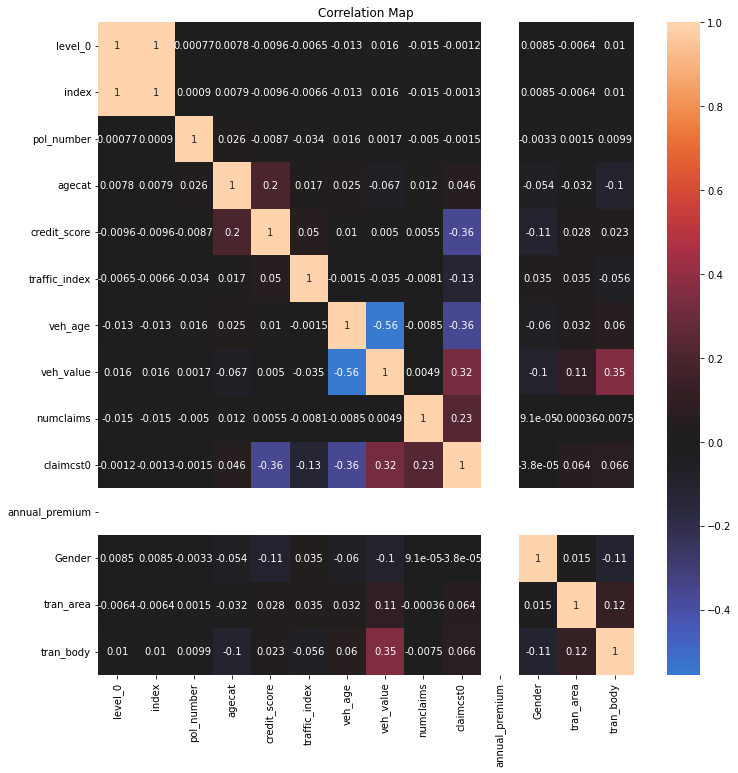

In [883]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [884]:
df1 = scaler.fit_transform(df)

In [885]:
df.dtypes

level_0             int64
index               int64
pol_number          int32
agecat            float64
credit_score      float64
traffic_index     float64
veh_age             int64
veh_value         float64
numclaims           int64
claimcst0         float64
annual_premium    float64
Gender              int64
tran_area           int64
tran_body           int64
dtype: object

In [886]:
df1

array([[-1.73183759, -1.74025057,  1.26708463, ..., -0.69545163,
         0.05676878, -1.08579924],
       [-1.73141114, -1.74007772,  0.08262247, ..., -0.69545163,
         1.54189843, -0.64502227],
       [-1.73098468, -1.73950158, -1.37744797, ...,  1.43791453,
        -0.68579605, -1.08579924],
       ...,
       [ 1.73098468,  1.73719373,  1.21125217, ..., -0.69545163,
         0.05676878, -1.08579924],
       [ 1.73141114,  1.73725135,  1.34647679, ..., -0.69545163,
        -1.42836088, -0.2042453 ],
       [ 1.73183759,  1.73736657,  0.25367387, ..., -0.69545163,
        -1.42836088, -0.64502227]])

In [926]:
df1=df[['veh_value','claimcst0']]
df1.head()

,veh_value,claimcst0
0,1.5290,1120.833360
1,1.6500,4548.075015
2,1.6170,2265.262185
3,2.4178,6616.971570
4,1.1880,225.489518


In [927]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(df1)
XE_scaled_array = scaler.transform(df1)
XE_scaled = pd.DataFrame(XE_scaled_array, columns = df1.columns)
XE_scaled.sample(5)

,veh_value,claimcst0
6782,0.290136,-0.456401
4926,-0.943915,-0.492702
7740,3.107178,6.782559
8031,0.034815,-0.145091
4919,-0.177952,-0.037620


In [928]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  8123 non-null   float64
 1   claimcst0  8123 non-null   float64
dtypes: float64(2)
memory usage: 127.0 KB


In [929]:
# K-Means Clustering
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
seed = 0
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(XE_scaled)
# predict the cluster for each data point
yE_cluster_kmeans = km.predict(XE_scaled)
yE_cluster_kmeans

array([0, 0, 0, ..., 0, 0, 2], dtype=int32)

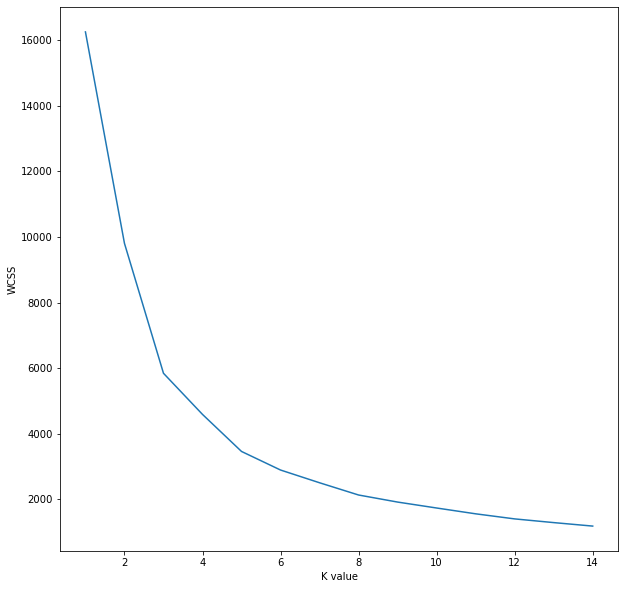

In [930]:
from sklearn.cluster import KMeans
wcss1 = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(XE_scaled)
    wcss1.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss1)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

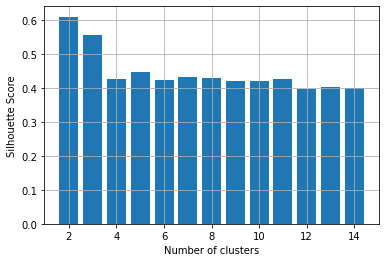

In [931]:
from sklearn.metrics import silhouette_score
silhouette_scores1 = [] 

for n_cluster in range(2,15):
    silhouette_scores1.append( 
        silhouette_score(XE_scaled, KMeans(n_clusters = n_cluster).fit_predict(XE_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores1) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show()

In [932]:
#dataWithoutLabels = data.loc[:,['radius_mean','texture_mean']]
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(df1)
df1["type"] = clusters
df1["type"].unique()

/var/folders/kt/8xcy1pxx0r96g44wzcxt36700000gn/T/ipykernel_14139/2561415605.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["type"] = clusters


array([1, 0], dtype=int32)

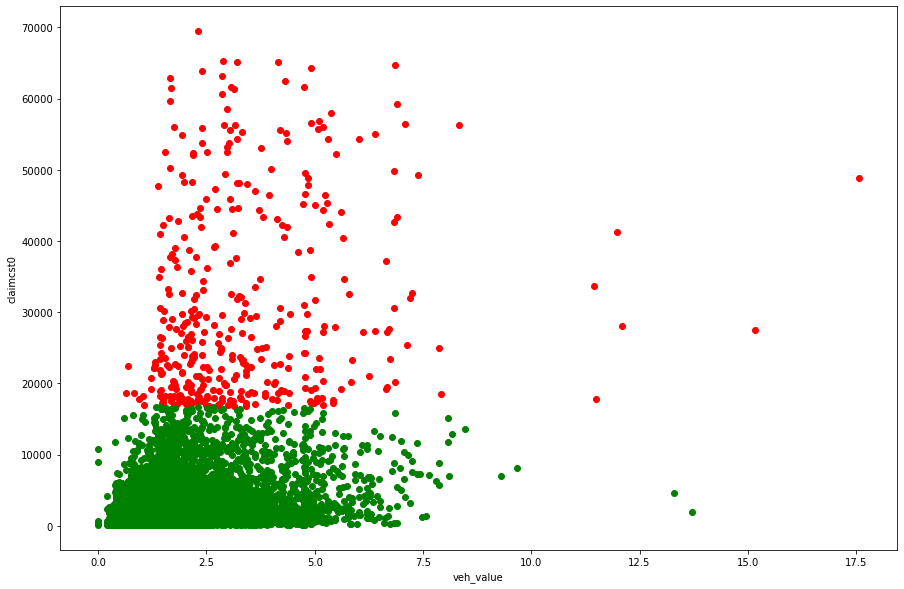

In [933]:
plt.figure(figsize = (15, 10))
plt.scatter(df1["veh_value"][df1["type"] == 0], df1["claimcst0"][df1["type"] == 0], color = "red")
plt.scatter(df1["veh_value"][df1["type"] == 1], df1["claimcst0"][df1["type"] == 1], color = "green")
plt.xlabel('veh_value')
plt.ylabel('claimcst0')
plt.show()

In [934]:
labelE = km1.fit_predict(XE_scaled)
print(labelE)

[0 0 0 ... 0 0 0]


In [935]:
from sklearn import metrics
score1 = metrics.silhouette_score(XE_scaled, yE_cluster_kmeans)
score1

0.5573159538616995

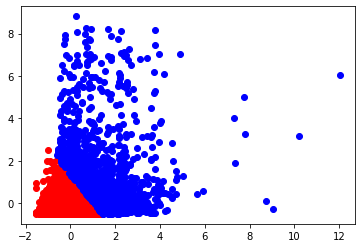

In [936]:
labelE_0 = XE_scaled[labelE == 0]
labelE_1 = XE_scaled[labelE == 1]

plt.scatter(labelE_0.iloc[:,0], labelE_0.iloc[:,1], color='red')
plt.scatter(labelE_1.iloc[:,0], labelE_1.iloc[:,1], color='blue')

In [937]:
score1 = metrics.silhouette_score(XE_scaled, ye_cluster_kmeans)
score1

0.6100505393496362

In [938]:
contingency_matrix2 = metrics.cluster.contingency_matrix(yE_cluster_kmeans,yE_cluster_kmeans)
contingency_matrix2

array([[6176,    0,    0],
       [   0,  274,    0],
       [   0,    0, 1673]])

In [939]:
np.amax(contingency_matrix2, axis=0)

array([6176,  274, 1673])

In [940]:
xe = np.sum(np.amax(contingency_matrix2, axis=0)) #Sum of max. elements from each row
xe

8123

In [941]:
ye = np.sum(contingency_matrix2)  #total sum of all elements in contingency matrix
ye

8123

In [942]:
purity = float(xe)/float(ye) 
purity

1.0

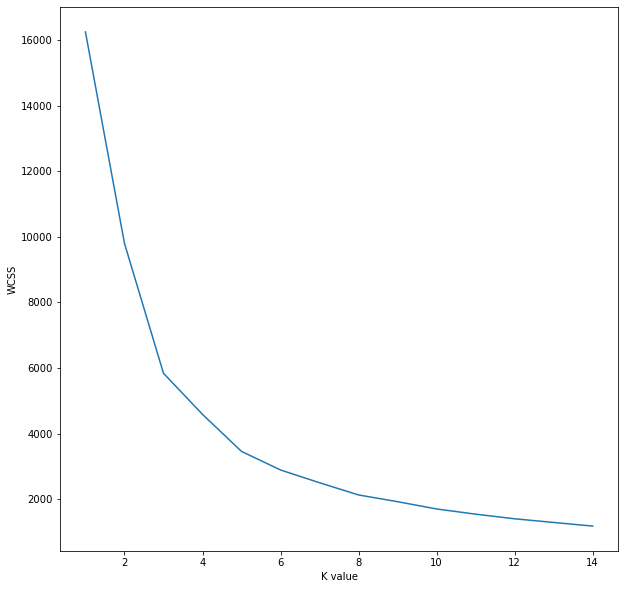

In [943]:
from sklearn.cluster import KMeans
wcss1 = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(XE_scaled)
    wcss1.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss1)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

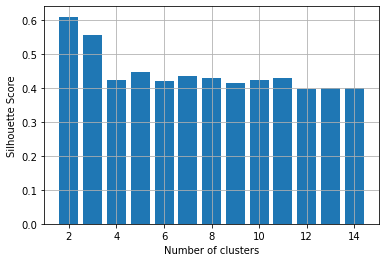

In [944]:
from sklearn.metrics import silhouette_score
silhouette_scores1 = [] 

for n_cluster in range(2,15):
    silhouette_scores1.append( 
        silhouette_score(XE_scaled, KMeans(n_clusters = n_cluster).fit_predict(XE_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores1) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [945]:
nclusters1 = 2 # this is the k in kmeans
seed1 = 0

km1 = KMeans(n_clusters=nclusters1, random_state=seed1)
km1.fit(XE_scaled)

# predict the cluster for each data point
ye_cluster_kmeans = km1.predict(XE_scaled)
ye_cluster_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [946]:
labelE = km1.fit_predict(XE_scaled)
print(labelE)

[0 0 0 ... 0 0 0]


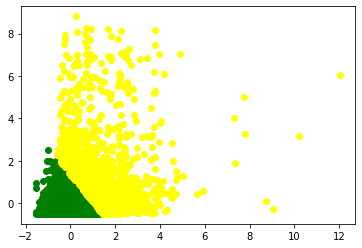

In [947]:
labelE_0 = XE_scaled[labelE == 0]
labelE_1 = XE_scaled[labelE == 1]

plt.scatter(labelE_0.iloc[:,0], labelE_0.iloc[:,1], color='green')
plt.scatter(labelE_1.iloc[:,0], labelE_1.iloc[:,1], color='yellow')

In [948]:
score1 = metrics.silhouette_score(XE_scaled, ye_cluster_kmeans)
score1

0.6100505393496362

In [949]:
km1.inertia_

9802.429099876272

In [950]:
km1.cluster_centers_

array([[-0.30912147, -0.24186375],
       [ 1.59170644,  1.24538777]])

In [951]:
df['numclaims']

0       0
1       1
2       0
3       2
4       1
       ..
8118    0
8119    0
8120    0
8121    0
8122    0
Name: numclaims, Length: 8123, dtype: int64

In [952]:
#Convert categorical variable into integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['numclaims'] = le.fit_transform(df['numclaims'])
k=df['numclaims']
L = le.transform(y)

In [953]:
correct_labels = sum(L == labelE)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, L.size))

Result: 5804 out of 8123 samples were correctly labeled.


In [954]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.71


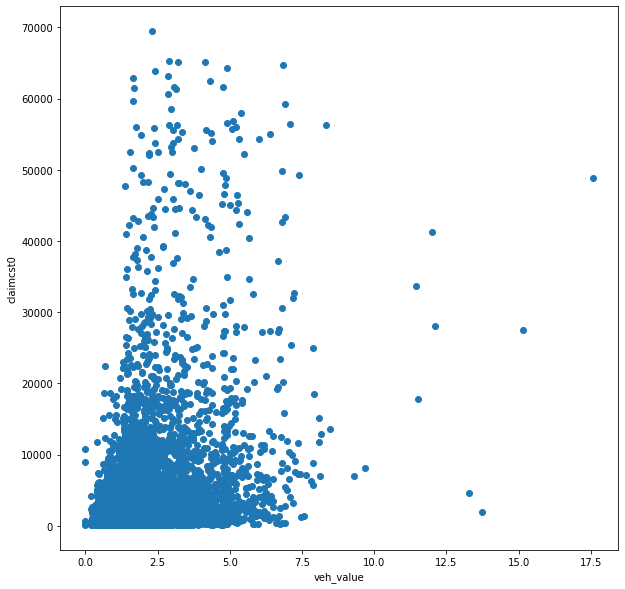

In [960]:

plt.figure(figsize = (10, 10))
plt.scatter(df1["veh_value"], df1["claimcst0"])
plt.xlabel('veh_value')
plt.ylabel('claimcst0')
plt.show()

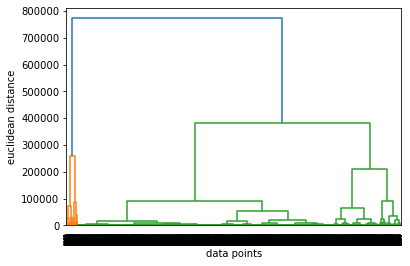

In [962]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df1, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [964]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df1)
df1["label"] = cluster

/var/folders/kt/8xcy1pxx0r96g44wzcxt36700000gn/T/ipykernel_14139/1299873797.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["label"] = cluster


In [966]:
df1.label.value_counts()

0    7861
1     262
Name: label, dtype: int64

In [968]:
df2= df1[['veh_value','claimcst0']]

In [970]:
df2.head()

,veh_value,claimcst0
0,1.5290,1120.833360
1,1.6500,4548.075015
2,1.6170,2265.262185
3,2.4178,6616.971570
4,1.1880,225.489518


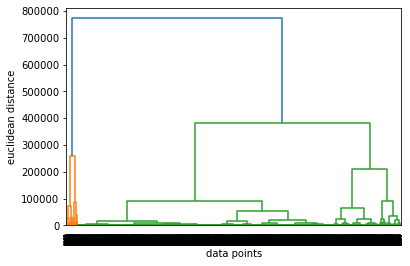

In [971]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(df2, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [972]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df2)
df2["label"] = cluster

/var/folders/kt/8xcy1pxx0r96g44wzcxt36700000gn/T/ipykernel_14139/611740974.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["label"] = cluster


In [973]:
df2.label.value_counts()

0    7861
1     262
Name: label, dtype: int64

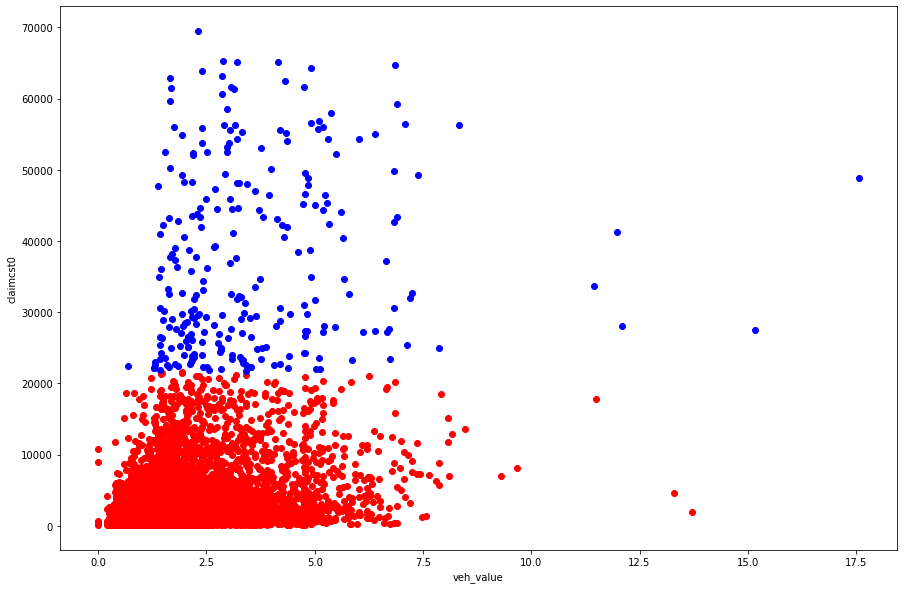

In [975]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))
plt.scatter(df2["veh_value"][df2.label == 0], df2["claimcst0"][df2.label == 0], color = "red")
plt.scatter(df2["veh_value"][df2.label == 1], df2["claimcst0"][df2.label == 1], color = "blue")
plt.xlabel("veh_value")
plt.ylabel("claimcst0")
plt.show()